In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/training_grover.csv",sep=';')
data.head()

,Unnamed: 0,x.0,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.20,x.17,x.18,x.19,x.16,y
0,0,b,"30,83",f,u,g,w,v,1.25,t,t,t,f,g,202.0,f,t,"116,94256980957068","0,5787085579422866",202000.0,f,good
1,1,a,"58,67",4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,t,"225,60625307204938","25,409645364400404",43000.0,f,good
2,2,a,"24,5",0.5,u,g,q,h,1.5,t,f,f,f,g,280.0,824,t,"92,08407670672422","2,3173371593153314",280000.0,f,good
3,3,b,"27,83",1.54,u,g,w,v,3.75,t,t,5,t,g,100.0,3,t,"104,16291777029285","8,04533772976642",100000.0,f,good
4,4,b,"20,17",5.625,u,g,w,v,1.71,t,f,f,f,s,120.0,f,t,"77,8703024439662","31,111460957322073",120000.0,f,good


In [158]:
#Now I will read test data here
data_v = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/validation_grover.csv",sep=';')
data_v.head()

,Unnamed: 0,x.0,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.20,x.17,x.18,x.19,x.16,y
0,200,a,"24,08",0.5,u,g,q,h,1.25,t,t,t,f,g,f,678,t,"92,74793816815001","3,2643617743722135",f,t,good
1,201,a,"41,33",t,u,g,i,bb,2.25,t,f,f,t,g,f,300,t,"156,577107673316","4,70468160482802",f,t,good
2,202,b,"24,83",2.75,u,g,c,v,2.25,t,t,6,f,g,?,600,t,"91,15015080431874","16,99038149514617",?,f,good
3,203,a,"20,75",10.25,u,g,q,v,0.71,t,t,2,t,g,49.0,f,t,"76,95618100795284","59,075031931843256",49000.0,t,good
4,204,b,"36,33",2.125,y,p,w,v,0.085,t,t,t,f,g,50.0,1187,t,"138,68766750212055","11,077167989738914",50000.0,t,good


In [159]:
data.isnull().sum()
data_v.isnull().sum()
# Null data check shows there no NaN data in file so we can go ahead to explore more on columns one by one

Unnamed: 0    0
x.0           0
x.1           0
x.2           0
x.3           0
x.4           0
x.5           0
x.6           0
x.7           0
x.8           0
x.9           0
x.10          0
x.11          0
x.12          0
x.13          0
x.14          0
x.20          0
x.17          0
x.18          0
x.19          0
x.16          0
y             0
dtype: int64

In [160]:
print(data.info())
print(data_v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 22 columns):
Unnamed: 0    2671 non-null int64
x.0           2671 non-null object
x.1           2671 non-null object
x.2           2671 non-null object
x.3           2671 non-null object
x.4           2671 non-null object
x.5           2671 non-null object
x.6           2671 non-null object
x.7           2671 non-null object
x.8           2671 non-null object
x.9           2671 non-null object
x.10          2671 non-null object
x.11          2671 non-null object
x.12          2671 non-null object
x.13          2671 non-null object
x.14          2671 non-null object
x.20          2671 non-null object
x.17          2671 non-null object
x.18          2671 non-null object
x.19          2671 non-null object
x.16          2671 non-null object
y             2671 non-null object
dtypes: int64(1), object(21)
memory usage: 459.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 t

#Now here I can create a class of importer to fill numerical and categorical variable by creating one class and all code in one. But I am using separate one by one code so I can explore the data more, take decision in depth and can explain what I have imputed in detail for a better understanding. On Production env only class will be used.

In [161]:
# check with x.0 column
print(data['x.0'].value_counts())

# here we have to replace ? with Mode of the data column x.0. So all ? will be replaced with b as Mode of above variable is b
data['x.0'] = data['x.0'].replace('?',np.nan)
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
data['x.0'] = imputer.fit_transform(data['x.0'])
data['x.0'] = 'x.0_' + data['x.0'].astype(str)
print(data['x.0'].value_counts())


print(data_v['x.0'].value_counts())

# here we have to replace ? with Mode of the data column x.0. So all ? will be replaced with b as Mode of above variable is b
data_v['x.0'] = data_v['x.0'].replace('?',np.nan)
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
data_v['x.0'] = imputer.fit_transform(data_v['x.0'])
data_v['x.0'] = 'x.0_' + data_v['x.0'].astype(str)
print(data_v['x.0'].value_counts())

b    1833
a     823
?      15
Name: x.0, dtype: int64
x.0_b    1848
x.0_a     823
Name: x.0, dtype: int64
b    332
a    146
?     12
Name: x.0, dtype: int64
x.0_b    344
x.0_a    146
Name: x.0, dtype: int64


In [162]:
# check with x.1 column
print(data['x.1'].value_counts())
print(data["x.1"][data["x.1"].str.isalpha()].value_counts())

# here we have to replace ',' with '.' . 
data['x.1'] = [x.replace(',', '.') for x in data['x.1']]

# here we have to replace '?' with mean of the data column x.1. 
data['x.1'] = data['x.1'].replace('?',0).astype(float)
data['x.1'] = data['x.1'].replace(0,data['x.1'].mean())
print(data['x.1'].value_counts())

print(data_v['x.1'].value_counts())
print(data_v["x.1"][data_v["x.1"].str.isalpha()].value_counts())

# here we have to replace ',' with '.' . 
data_v['x.1'] = [x.replace(',', '.') for x in data_v['x.1']]

# here we have to replace '?' with mean of the data column x.1. 
data_v['x.1'] = data_v['x.1'].replace('?',0).astype(float)
data_v['x.1'] = data_v['x.1'].replace(0,data['x.1'].mean())
print(data_v['x.1'].value_counts())

23,25    47
35,17    41
39,92    37
19,17    33
24,5     28
         ..
20,83     1
49,0      1
26,58     1
27,33     1
69,5      1
Name: x.1, Length: 292, dtype: int64
Series([], Name: x.1, dtype: int64)
23.25    47
35.17    41
39.92    37
19.17    33
20.42    28
         ..
35.00     1
26.25     1
19.50     1
31.75     1
51.92     1
Name: x.1, Length: 292, dtype: int64
?        8
22,67    7
23,58    6
22,5     5
18,83    5
        ..
32,67    1
46,0     1
43,25    1
48,08    1
39,25    1
Name: x.1, Length: 289, dtype: int64
Series([], Name: x.1, dtype: int64)
34.161678    8
22.670000    7
23.580000    6
20.420000    5
22.500000    5
            ..
44.330000    1
52.170000    1
51.580000    1
27.420000    1
60.080000    1
Name: x.1, Length: 289, dtype: int64


In [163]:
# check with x.2 column
print(data['x.2'].value_counts())
print(data["x.2"][data["x.2"].str.isalpha()].value_counts())

# as we found char 'f' and 't' among Numerical variable
# I am going with replacing f and t with mean value of column

data['x.2'] = data['x.2'].replace(['f','t'],0).astype(float)
data['x.2'] = data['x.2'].replace(0,data['x.2'].mean())
print(data['x.2'].value_counts())

print(data_v['x.2'].value_counts())
print(data_v["x.2"][data_v["x.2"].str.isalpha()].value_counts())

# as we found char 'f' and 't' among Numerical variable
# I am going with replacing f and t with mean value of column

data_v['x.2'] = data_v['x.2'].replace(['f','t'],0).astype(float)
data_v['x.2'] = data_v['x.2'].replace(0,data_v['x.2'].mean())
print(data_v['x.2'].value_counts())

6.5       74
f         73
0.5       70
5.0       69
11.0      66
          ..
4.585      1
2.835      1
12.625     1
0.17       1
26.335     1
Name: x.2, Length: 178, dtype: int64
f    73
t    52
Name: x.2, dtype: int64
5.891625     125
6.500000      74
0.500000      70
5.000000      69
11.000000     66
            ... 
14.585000      1
2.835000       1
5.290000       1
13.665000      1
11.460000      1
Name: x.2, Length: 177, dtype: int64
f        16
3.0      16
2.5      15
1.25     15
1.5      14
         ..
2.125     1
5.125     1
0.625     1
22.29     1
5.835     1
Name: x.2, Length: 177, dtype: int64
f    16
t     6
Name: x.2, dtype: int64
4.334469     22
3.000000     16
1.250000     15
2.500000     15
0.750000     14
             ..
5.290000      1
5.710000      1
22.290000     1
1.460000      1
4.790000      1
Name: x.2, Length: 176, dtype: int64


In [164]:
# check with x.3 column
print(data['x.3'].value_counts())
# here we have to replace '?' with Mode of the data column x.3. So all '?' will be replaced with 'u' as Mode of above variable is 'u'
data['x.3'] = data['x.3'].replace('?',np.nan)
data['x.3'] = imputer.fit_transform(data['x.3'])
data['x.3'] = 'x.3_' + data['x.3'].astype(str)
print(data['x.3'].value_counts())

print(data_v['x.3'].value_counts())
# here we have to replace '?' with Mode of the data column x.3. So all '?' will be replaced with 'u' as Mode of above variable is 'u'
data_v['x.3'] = data_v['x.3'].replace('?',np.nan)
data_v['x.3'] = imputer.fit_transform(data_v['x.3'])
data_v['x.3'] = 'x.3_' + data_v['x.3'].astype(str)
print(data_v['x.3'].value_counts())

u    2166
y     464
?      24
l      17
Name: x.3, dtype: int64
x.3_u    2190
x.3_y     464
x.3_l      17
Name: x.3, dtype: int64
u    359
y    123
?      6
l      2
Name: x.3, dtype: int64
x.3_u    365
x.3_y    123
x.3_l      2
Name: x.3, dtype: int64


In [165]:
# check with x.4 column
print(data['x.4'].value_counts())
# here we have to replace '?' with Mode of the data column x.4. So all '?' will be replaced with 'g' as Mode of above variable is 'g'
data['x.4'] = data['x.4'].replace('?',np.nan)
data['x.4'] = imputer.fit_transform(data['x.4'])
data['x.4'] = 'x.4_' + data['x.4'].astype(str)
print(data['x.4'].value_counts())

print(data_v['x.4'].value_counts())
# here we have to replace '?' with Mode of the data column x.4. So all '?' will be replaced with 'g' as Mode of above variable is 'g'
data_v['x.4'] = data_v['x.4'].replace('?',np.nan)
data_v['x.4'] = imputer.fit_transform(data_v['x.4'])
data_v['x.4'] = 'x.4_' + data_v['x.4'].astype(str)
print(data_v['x.4'].value_counts())

g     2166
p      464
?       24
gg      17
Name: x.4, dtype: int64
x.4_g     2190
x.4_p      464
x.4_gg      17
Name: x.4, dtype: int64
g     359
p     123
?       6
gg      2
Name: x.4, dtype: int64
x.4_g     365
x.4_p     123
x.4_gg      2
Name: x.4, dtype: int64


In [166]:
# check with x.5 column
print(data['x.5'].value_counts())
# here we have to replace '?' with Mode of the data column x.5. So all '?' will be replaced with 'q' as Mode of above variable is 'q'
data['x.5'] = data['x.5'].replace('?',np.nan)
data['x.5'] = imputer.fit_transform(data['x.5'])
data['x.5'] = 'x.5_' + data['x.5'].astype(str)
print(data['x.5'].value_counts())

print(data_v['x.5'].value_counts())
# here we have to replace '?' with Mode of the data column x.5. So all '?' will be replaced with 'q' as Mode of above variable is 'q'
data_v['x.5'] = data_v['x.5'].replace('?',np.nan)
data_v['x.5'] = imputer.fit_transform(data_v['x.5'])
data_v['x.5'] = 'x.5_' + data_v['x.5'].astype(str)
print(data_v['x.5'].value_counts())

q     539
c     422
cc    290
w     259
x     198
i     170
aa    159
m     149
k     145
e     114
ff     85
d      82
?      25
j      25
r       9
Name: x.5, dtype: int64
x.5_q     564
x.5_c     422
x.5_cc    290
x.5_w     259
x.5_x     198
x.5_i     170
x.5_aa    159
x.5_m     149
x.5_k     145
x.5_e     114
x.5_ff     85
x.5_d      82
x.5_j      25
x.5_r       9
Name: x.5, dtype: int64
c     99
ff    50
i     49
w     44
q     42
k     39
aa    37
x     25
m     25
d     23
cc    22
e     17
?      9
j      7
r      2
Name: x.5, dtype: int64
x.5_c     108
x.5_ff     50
x.5_i      49
x.5_w      44
x.5_q      42
x.5_k      39
x.5_aa     37
x.5_m      25
x.5_x      25
x.5_d      23
x.5_cc     22
x.5_e      17
x.5_j       7
x.5_r       2
Name: x.5, dtype: int64


In [167]:
# check with x.6 column
print(data['x.6'].value_counts())
# here we have to replace '?' with Mode of the data column x.6. So all '?' will be replaced with 'v' as Mode of above variable is 'v'
data['x.6'] = data['x.6'].replace('?',np.nan)
data['x.6'] = imputer.fit_transform(data['x.6'])
data['x.6'] = 'x.6_' + data['x.6'].astype(str)
print(data['x.6'].value_counts())

print(data_v['x.6'].value_counts())
# here we have to replace '?' with Mode of the data column x.6. So all '?' will be replaced with 'v' as Mode of above variable is 'v'
data_v['x.6'] = data_v['x.6'].replace('?',np.nan)
data_v['x.6'] = imputer.fit_transform(data_v['x.6'])
data_v['x.6'] = 'x.6_' + data_v['x.6'].astype(str)
print(data_v['x.6'].value_counts())

v     1415
h      774
bb     279
ff      96
z       44
?       25
j       13
n       11
o       10
dd       4
Name: x.6, dtype: int64
x.6_v     1440
x.6_h      774
x.6_bb     279
x.6_ff      96
x.6_z       44
x.6_j       13
x.6_n       11
x.6_o       10
x.6_dd       4
Name: x.6, dtype: int64
v     289
h      80
ff     53
bb     36
?       9
dd      6
j       6
z       5
n       4
o       2
Name: x.6, dtype: int64
x.6_v     298
x.6_h      80
x.6_ff     53
x.6_bb     36
x.6_j       6
x.6_dd      6
x.6_z       5
x.6_n       4
x.6_o       2
Name: x.6, dtype: int64


In [168]:
# check with x.7 column
print(data['x.7'].value_counts())
print(data["x.7"][data["x.7"].str.isalpha()].value_counts())
# as we found char 'f' and 't' among Numerical variable
# I am going with replacing f and t with mode value which is 0.04

data['x.7'] = data['x.7'].replace(['f','t'],0).astype(float)
data['x.7'] = data['x.7'].replace(0,data['x.7'].mean())
print(data['x.7'].value_counts())

print(data_v['x.7'].value_counts())
print(data_v["x.7"][data_v["x.7"].str.isalpha()].value_counts())
# as we found char 'f' and 't' among Numerical variable
# I am going with replacing f and t with mode value which is 0.04

data_v['x.7'] = data_v['x.7'].replace(['f','t'],0).astype(float)
data_v['x.7'] = data_v['x.7'].replace(0,data_v['x.7'].mean())
print(data_v['x.7'].value_counts())

f        139
0.04     129
1.5      119
2.5      104
5.0      101
        ... 
9.46       1
3.335      1
2.335      1
0.455      1
11.5       1
Name: x.7, Length: 120, dtype: int64
f    139
t     55
Name: x.7, dtype: int64
3.556864     194
0.040000     129
1.500000     119
2.500000     104
5.000000     101
            ... 
0.455000       1
11.500000      1
2.335000       1
3.335000       1
2.790000       1
Name: x.7, Length: 119, dtype: int64
f        63
0.25     28
0.125    27
t        25
0.04     25
         ..
2.585     1
2.04      1
6.75      1
0.46      1
5.085     1
Name: x.7, Length: 94, dtype: int64
f    63
t    25
Name: x.7, dtype: int64
1.641122     88
0.250000     28
0.125000     27
0.085000     25
0.040000     25
             ..
16.000000     1
1.875000      1
2.625000      1
6.750000      1
3.040000      1
Name: x.7, Length: 93, dtype: int64


In [169]:
# check with x.8 column
print(data['x.8'].value_counts())
data['x.8'] = 'x.8_' + data['x.8'].astype(str)

print(data_v['x.8'].value_counts())
data_v['x.8'] = 'x.8_' + data_v['x.8'].astype(str)
# here data looks ok. will convert it into dummy variable in next stage

t    2257
a     151
c     147
b     116
Name: x.8, dtype: int64
t    168
c    117
b    108
a     97
Name: x.8, dtype: int64


In [170]:
# check with x.9 column
print(data['x.9'].value_counts())
data['x.9'] = 'x.9_' + data['x.9'].astype(str)

print(data_v['x.9'].value_counts())
data_v['x.9'] = 'x.9_' + data_v['x.9'].astype(str)
# here data looks ok. will convert it into dummy variable in next stage

t    1662
f    1009
Name: x.9, dtype: int64
f    318
t    172
Name: x.9, dtype: int64


In [171]:
# check with x.10 column
print(data['x.10'].value_counts())
print(data["x.10"][data["x.10"].str.isalpha()].value_counts())
# Here out of 2671 total 1305 are categorical value.
# that means approx 50% percent are numerical and approx 50% Categorical.
# So changing it to catgory or number will lead us to wrong prediction as it will bias to the filled data.
# Here I am taking decision to drop this column as I can't get good information out of it.

data = data.drop('x.10', axis = 1)

print(data_v['x.10'].value_counts())
print(data_v["x.10"][data_v["x.10"].str.isalpha()].value_counts())

data_v = data_v.drop('x.10', axis = 1)

f     1009
t      296
6      197
2      175
3      165
11     132
7      128
5       95
12      71
9       67
14      62
8       60
15      50
4       49
10      25
17      21
40      15
67      14
13      12
23      12
20       9
16       7
Name: x.10, dtype: int64
f    1009
t     296
Name: x.10, dtype: int64
f     318
t      52
2      31
3      12
5      12
6      11
4      11
11     10
8       7
7       6
10      6
9       4
14      3
16      3
19      1
13      1
15      1
12      1
Name: x.10, dtype: int64
f    318
t     52
Name: x.10, dtype: int64


In [172]:
# check with x.11 column
print(data['x.11'].value_counts())
data['x.11'] = 'x.11_' + data['x.11'].astype(str)
# here data looks ok. will convert it into dummy variable in next stage

print(data_v['x.11'].value_counts())
data_v['x.11'] = 'x.11_' + data_v['x.11'].astype(str)

f    1380
t    1291
Name: x.11, dtype: int64
f    282
t    208
Name: x.11, dtype: int64


In [173]:
# check with x.12 column
print(data['x.12'].value_counts())
data['x.12'] = 'x.12_' + data['x.12'].astype(str)
# here data looks ok. will convert it into dummy variable in next stage

print(data_v['x.12'].value_counts())
data_v['x.12'] = 'x.12_' + data_v['x.12'].astype(str)

g    2480
s     157
p      34
Name: x.12, dtype: int64
g    439
s     43
p      8
Name: x.12, dtype: int64


In [174]:
# check with x.13 column
print(data['x.13'].value_counts())
# here we have to replace '?' and 'f' with Mean of the data column x.13. as 710 records are 'f' and I can not select mode here and it will lead to bias
data['x.13'] = data['x.13'].replace(['f','?'],0).astype(float)
data['x.13'] = data['x.13'].replace(0,data['x.13'].mean())
print(data['x.13'].value_counts())

print(data_v['x.13'].value_counts())
# here we have to replace '?' and 'f' with Mean of the data column x.13. as 710 records are 'f' and I can not select mode here and it will lead to bias
data_v['x.13'] = data_v['x.13'].replace(['f','?'],0).astype(float)
data_v['x.13'] = data_v['x.13'].replace(0,data_v['x.13'].mean())
print(data_v['x.13'].value_counts())

f         658
100.0     157
80.0      146
120.0      92
200.0      86
         ... 
1160.0      1
640.0       1
110.0       1
443.0       1
62.0        1
Name: x.13, Length: 142, dtype: int64
163.786597    710
100.000000    157
80.000000     146
120.000000     92
200.000000     86
             ... 
640.000000      1
550.000000      1
141.000000      1
454.000000      1
45.000000       1
Name: x.13, Length: 141, dtype: int64
f         84
200.0     28
160.0     28
120.0     26
100.0     21
          ..
164.0      1
422.0      1
28.0       1
221.0      1
1160.0     1
Name: x.13, Length: 127, dtype: int64
183.969388    96
160.000000    28
200.000000    28
120.000000    26
100.000000    21
              ..
99.000000      1
760.000000     1
680.000000     1
163.000000     1
49.000000      1
Name: x.13, Length: 126, dtype: int64


In [175]:
# check with x.14 column
print(data['x.14'].value_counts())
print(data["x.14"][data["x.14"].str.isalpha()].value_counts())
# here we have to drop the column
# replace 'f' and 't' with Mean of column value. The Total count of f and t is approx 40% which is 1050
# but it"s mean is coming "2125.071509" for 1081 records which leads to bias

data = data.drop('x.14', axis = 1)

print(data_v['x.14'].value_counts())
print(data_v["x.14"][data_v["x.14"].str.isalpha()].value_counts())
data_v = data_v.drop('x.14', axis = 1)

f       1050
300       75
1000      59
500       45
560       35
        ... 
98         1
173        1
126        1
60         1
228        1
Name: x.14, Length: 178, dtype: int64
f    1050
t      31
Name: x.14, dtype: int64
f       206
t        28
2         8
1000      7
6         6
       ... 
5860      1
9800      1
1344      1
340       1
2206      1
Name: x.14, Length: 179, dtype: int64
f    206
t     28
Name: x.14, dtype: int64


In [176]:
# check with x.16 column
print(data['x.16'].value_counts())
# here we have to replace '?' with Mode of the data column x.16. So all '?' will be replaced with 'f' as Mode of above variable is 'f'
data['x.16'] = data['x.16'].replace('?',np.nan)
data['x.16'] = imputer.fit_transform(data['x.16'])
data['x.16'] = 'x.16_' + data['x.16'].astype(str)
print(data['x.16'].value_counts())

print(data_v['x.16'].value_counts())
# here we have to replace '?' with Mode of the data column x.16. So all '?' will be replaced with 'f' as Mode of above variable is 'f'
data_v['x.16'] = data_v['x.16'].replace('?',np.nan)
data_v['x.16'] = imputer.fit_transform(data_v['x.16'])
data_v['x.16'] = 'x.16_' + data_v['x.16'].astype(str)
print(data_v['x.16'].value_counts())

f    1797
?     668
t     206
Name: x.16, dtype: int64
x.16_f    2465
x.16_t     206
Name: x.16, dtype: int64
t    296
f    194
Name: x.16, dtype: int64
x.16_t    296
x.16_f    194
Name: x.16, dtype: int64


In [177]:
# check with x.17 column
print(data['x.17'].value_counts())
print(data["x.17"][data["x.17"].str.isalpha()].value_counts())

# can't decide if ',' is given in between whole number or it act as decimal point. After look on actual data column we can decide the same
# As of now here I am replacing ',' with '.' . 
data['x.17'] = [x.replace(',', '.') for x in data['x.17']]

# here we have to replace '?' and 'f' with Mean of the data column x.13. as 710 records are 'f' and I can not select mode here and it will lead to bias
data['x.17'] = data['x.17'].replace('?',0).astype(float)
data['x.17'] = data['x.17'].replace(0,data['x.17'].mean())

print(data_v['x.17'].value_counts())
print(data_v["x.17"][data_v["x.17"].str.isalpha()].value_counts())

# can't decide if ',' is given in between whole number or it act as decimal point. After look on actual data column we can decide the same
# As of now here I am replacing ',' with '.' . 
data_v['x.17'] = [x.replace(',', '.') for x in data_v['x.17']]

# here we have to replace '?' and 'f' with Mean of the data column x.13. as 710 records are 'f' and I can not select mode here and it will lead to bias
data_v['x.17'] = data_v['x.17'].replace('?',0).astype(float)
data_v['x.17'] = data_v['x.17'].replace(0,data_v['x.17'].mean())

142,71282893055113    21
150,34527961856327    20
76,48492583572703     20
127,30605465811978    19
74,2617471676903      18
                      ..
75,78206751999117      1
184,57383651652557     1
170,27105873547796     1
58,26533637973292      1
81,60987662903472      1
Name: x.17, Length: 483, dtype: int64
Series([], Name: x.17, dtype: int64)
?                     8
148,5540346369581     1
60,09384926739983     1
242,34880119833437    1
103,93332074634682    1
                     ..
119,29628939298861    1
89,11849198826964     1
133,12031227678185    1
176,9914677639187     1
156,53230275487246    1
Name: x.17, Length: 483, dtype: int64
Series([], Name: x.17, dtype: int64)


In [178]:
# check with x.18 column
print(data['x.18'].value_counts())
print(data["x.18"][data["x.18"].str.isalpha()].value_counts())

# can't decide if ',' is given in between whole number or it act as decimal point. After look on actual data column we can decide the same
# As of now here I am replacing ',' with '.' . 
data['x.18'] = [x.replace(',', '.') for x in data['x.18']]
data['x.18'] = data['x.18'].astype(float)
print(data['x.18'].value_counts())

print(data_v['x.18'].value_counts())
print(data_v["x.18"][data_v["x.18"].str.isalpha()].value_counts())

# can't decide if ',' is given in between whole number or it act as decimal point. After look on actual data column we can decide the same
# As of now here I am replacing ',' with '.' . 
data_v['x.18'] = [x.replace(',', '.') for x in data_v['x.18']]
data_v['x.18'] = data_v['x.18'].astype(float)
print(data_v['x.18'].value_counts())

5,502009139465553     21
1,7196083330867018    20
35,66336266708667     20
1,4567043474025236    19
10,672881031682124    18
                      ..
9,059056996180981      1
7,651740760183541      1
24,785679720501985     1
34,42633856674666      1
73,27597998863978      1
Name: x.18, Length: 491, dtype: int64
Series([], Name: x.18, dtype: int64)
5.502009     21
1.719608     20
35.663363    20
1.456704     19
63.286150    18
             ..
27.686223     1
7.651741      1
13.460756     1
5.249772      1
38.916098     1
Name: x.18, Length: 491, dtype: int64
73,27597998863978     1
9,448241786964928     1
21,16257928669975     1
16,891040810823572    1
82,82548423604132     1
                     ..
9,851907503455243     1
8,615701696161766     1
5,5245908086440645    1
37,400479912755245    1
3,479351982964696     1
Name: x.18, Length: 490, dtype: int64
Series([], Name: x.18, dtype: int64)
7.730652     1
19.165945    1
5.852070     1
83.549322    1
5.759283     1
            ..
2.47056

In [179]:
# check with x.19 column
print(data['x.19'].value_counts())
print(data["x.19"][data["x.19"].str.isalpha()].value_counts())
# here we have to replace 'f' and '?' with Mean of the data column x.19.
data['x.19'] = data['x.19'].replace(['f','?'],0).astype(float)
data['x.19'] = data['x.19'].replace(0,data['x.19'].mean())
print(data['x.19'].value_counts())

print(data_v['x.19'].value_counts())
print(data_v["x.19"][data_v["x.19"].str.isalpha()].value_counts())
# here we have to replace 'f' and '?' with Mean of the data column x.19.
data_v['x.19'] = data_v['x.19'].replace(['f','?'],0).astype(float)
data_v['x.19'] = data_v['x.19'].replace(0,data_v['x.19'].mean())
print(data_v['x.19'].value_counts())

f           658
100000.0    157
80000.0     146
120000.0     92
200000.0     86
           ... 
152000.0      1
45000.0       1
110000.0      1
178000.0      1
980000.0      1
Name: x.19, Length: 142, dtype: int64
f    658
Name: x.19, dtype: int64
163786.59678    710
100000.00000    157
80000.00000     146
120000.00000     92
200000.00000     86
               ... 
980000.00000      1
221000.00000      1
178000.00000      1
372000.00000      1
171000.00000      1
Name: x.19, Length: 141, dtype: int64
f           84
160000.0    28
200000.0    28
120000.0    26
80000.0     21
            ..
422000.0     1
465000.0     1
263000.0     1
640000.0     1
519000.0     1
Name: x.19, Length: 127, dtype: int64
f    84
Name: x.19, dtype: int64
183969.387755    96
200000.000000    28
160000.000000    28
120000.000000    26
80000.000000     21
                 ..
129000.000000     1
399000.000000     1
396000.000000     1
349000.000000     1
56000.000000      1
Name: x.19, Length: 126, dtype: int64


In [180]:
# check with x.20 column
print(data['x.20'].value_counts())
# here we have to drop this column
#beacuse 2180 records are ? and if more than 50% of data is missing then we should drop the column instead of filling
# It leads to incorrect prediction if we fill data with mode

data = data.drop('x.20', axis = 1)
data_v = data_v.drop('x.20', axis = 1)

?    2180
t     252
f     239
Name: x.20, dtype: int64


In [181]:
# check with y column
print(data['y'].value_counts())
# here we have to change good to 1 and bad to 0 for classfication
data['y'] = data['y'].replace('good',1)
data['y'] = data['y'].replace('bad',0)
print(data['y'].value_counts())

print(data_v['y'].value_counts())
# here we have to change good to 1 and bad to 0 for classfication
data_v['y'] = data_v['y'].replace('good',1)
data_v['y'] = data_v['y'].replace('bad',0)
print(data_v['y'].value_counts())

good    2398
bad      273
Name: y, dtype: int64
1    2398
0     273
Name: y, dtype: int64
bad     336
good    154
Name: y, dtype: int64
0    336
1    154
Name: y, dtype: int64


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 19 columns):
Unnamed: 0    2671 non-null int64
x.0           2671 non-null object
x.1           2671 non-null float64
x.2           2671 non-null float64
x.3           2671 non-null object
x.4           2671 non-null object
x.5           2671 non-null object
x.6           2671 non-null object
x.7           2671 non-null float64
x.8           2671 non-null object
x.9           2671 non-null object
x.11          2671 non-null object
x.12          2671 non-null object
x.13          2671 non-null float64
x.17          2671 non-null float64
x.18          2671 non-null float64
x.19          2671 non-null float64
x.16          2671 non-null object
y             2671 non-null int64
dtypes: float64(7), int64(2), object(10)
memory usage: 396.6+ KB


In [183]:
# Changing categorical columns in dummy columns for training dataframe
x_0 = pd.get_dummies(data["x.0"]).astype(int)
x_3 = pd.get_dummies(data["x.3"]).astype(int)
x_4 = pd.get_dummies(data["x.4"]).astype(int)
x_5 = pd.get_dummies(data["x.5"]).astype(int)
x_6 = pd.get_dummies(data["x.6"]).astype(int)
x_8 = pd.get_dummies(data["x.8"]).astype(int)
x_9 = pd.get_dummies(data["x.9"]).astype(int)
x_11 = pd.get_dummies(data["x.11"]).astype(int)
x_12 = pd.get_dummies(data["x.12"]).astype(int)
x_16 = pd.get_dummies(data["x.16"]).astype(int)

data = pd.concat([data,x_0,x_3,x_4,x_5,x_6,x_8,x_9,x_11,x_12,x_16],axis =1)
data = data.drop([('x.0'),('x.3'),('x.4'),('x.5'),('x.6'),('x.8'),('x.9'),('x.11'),('x.12'),('x.16')], axis =1)
print(data.head(1))

   Unnamed: 0    x.1       x.2   x.7  ...  x.12_p  x.12_s  x.16_f  x.16_t
0           0  30.83  5.891625  1.25  ...       0       0       1       0

[1 rows x 53 columns]


In [184]:
# Changing categorical columns in dummy columns for validation dataframe
x_0 = pd.get_dummies(data_v["x.0"]).astype(int)
x_3 = pd.get_dummies(data_v["x.3"]).astype(int)
x_4 = pd.get_dummies(data_v["x.4"]).astype(int)
x_5 = pd.get_dummies(data_v["x.5"]).astype(int)
x_6 = pd.get_dummies(data_v["x.6"]).astype(int)
x_8 = pd.get_dummies(data_v["x.8"]).astype(int)
x_9 = pd.get_dummies(data_v["x.9"]).astype(int)
x_11 = pd.get_dummies(data_v["x.11"]).astype(int)
x_12 = pd.get_dummies(data_v["x.12"]).astype(int)
x_16 = pd.get_dummies(data_v["x.16"]).astype(int)

data_v = pd.concat([data_v,x_0,x_3,x_4,x_5,x_6,x_8,x_9,x_11,x_12,x_16],axis =1)
data_v = data_v.drop([('x.0'),('x.3'),('x.4'),('x.5'),('x.6'),('x.8'),('x.9'),('x.11'),('x.12'),('x.16')], axis =1)
print(data_v.head(1))

   Unnamed: 0    x.1  x.2   x.7  ...  x.12_p  x.12_s  x.16_f  x.16_t
0         200  24.08  0.5  1.25  ...       0       0       0       1

[1 rows x 53 columns]


In [185]:
data = data.apply(pd.to_numeric)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 53 columns):
Unnamed: 0    2671 non-null int64
x.1           2671 non-null float64
x.2           2671 non-null float64
x.7           2671 non-null float64
x.13          2671 non-null float64
x.17          2671 non-null float64
x.18          2671 non-null float64
x.19          2671 non-null float64
y             2671 non-null int64
x.0_a         2671 non-null int64
x.0_b         2671 non-null int64
x.3_l         2671 non-null int64
x.3_u         2671 non-null int64
x.3_y         2671 non-null int64
x.4_g         2671 non-null int64
x.4_gg        2671 non-null int64
x.4_p         2671 non-null int64
x.5_aa        2671 non-null int64
x.5_c         2671 non-null int64
x.5_cc        2671 non-null int64
x.5_d         2671 non-null int64
x.5_e         2671 non-null int64
x.5_ff        2671 non-null int64
x.5_i         2671 non-null int64
x.5_j         2671 non-null int64
x.5_k         2671 non-null i

In [186]:
data_v = data_v.apply(pd.to_numeric)
print(data_v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 53 columns):
Unnamed: 0    490 non-null int64
x.1           490 non-null float64
x.2           490 non-null float64
x.7           490 non-null float64
x.13          490 non-null float64
x.17          490 non-null float64
x.18          490 non-null float64
x.19          490 non-null float64
y             490 non-null int64
x.0_a         490 non-null int64
x.0_b         490 non-null int64
x.3_l         490 non-null int64
x.3_u         490 non-null int64
x.3_y         490 non-null int64
x.4_g         490 non-null int64
x.4_gg        490 non-null int64
x.4_p         490 non-null int64
x.5_aa        490 non-null int64
x.5_c         490 non-null int64
x.5_cc        490 non-null int64
x.5_d         490 non-null int64
x.5_e         490 non-null int64
x.5_ff        490 non-null int64
x.5_i         490 non-null int64
x.5_j         490 non-null int64
x.5_k         490 non-null int64
x.5_m         490 non-n

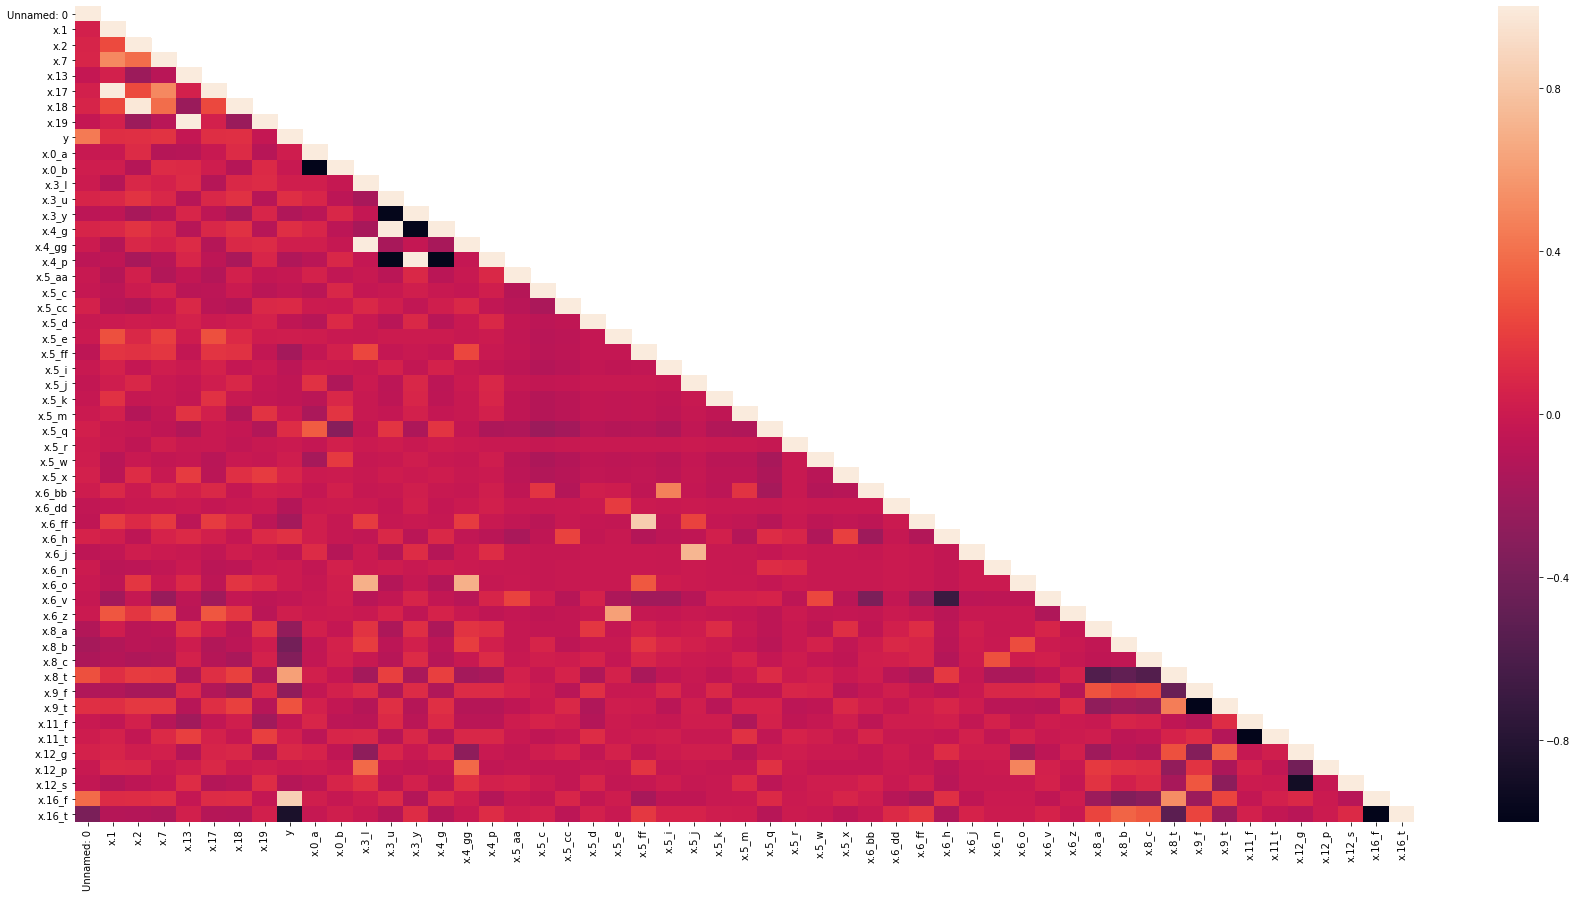

In [187]:
#Importing data visulaziation liberaries and checking heatmap to find correlation between columns to find best features
import matplotlib.pyplot as plt
import seaborn as sns
correlation = data.corr()
mask_data = np.array(correlation)
mask_data[np.tril_indices_from(mask_data)] = False
fig = plt.subplots(figsize=(30,15))
sns.heatmap(correlation, mask=mask_data)
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, precision_score,f1_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
data_x = data.drop('y', axis =1)
data_y = data['y']
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, random_state = 1)

In [203]:
#importing sklearn liberary to import diffrent regression algorithm
from prettytable import PrettyTable
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

models = [XGBClassifier(),
          DecisionTreeClassifier(), 
          ExtraTreesClassifier(),
          GradientBoostingClassifier(),
          RandomForestClassifier(),
          BaggingClassifier()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=4, random_state=0)
    predicted = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    #print(predicted.mean())
    table.add_row([type(model).__name__, format(predicted.mean(), '.2f')])

    
table = PrettyTable() 
table.field_names = ["Model", "Mean"]
for model in models:
    test_algorithms(model)
    
print(table)


+----------------------------+-------+
|           Model            |  Mean |
+----------------------------+-------+
|       XGBClassifier        | -0.00 |
|   DecisionTreeClassifier   | -0.01 |
|    ExtraTreesClassifier    | -0.01 |
| GradientBoostingClassifier | -0.00 |
|   RandomForestClassifier   | -0.01 |
|     BaggingClassifier      | -0.01 |
+----------------------------+-------+


In [204]:
from sklearn.metrics import mean_squared_log_error
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print('confusion_matrix')
print(confusion_matrix(y_test,pred))
print('recall_score - ',recall_score(y_test,pred))
print('accuracy_score - ',accuracy_score(y_test,pred))
print('precision_score - ',precision_score(y_test,pred))
print('f1_score - ',f1_score(y_test, pred, average="macro"))

confusion_matrix
[[ 59   0]
 [  1 608]]
recall_score -  0.9983579638752053
accuracy_score -  0.9985029940119761
precision_score -  1.0
f1_score -  0.9953874729842636


In [205]:
from sklearn.metrics import mean_squared_log_error
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
print('confusion_matrix')
print(confusion_matrix(y_test,pred))
print('recall_score - ',recall_score(y_test,pred))
print('accuracy_score - ',accuracy_score(y_test,pred))
print('precision_score - ',precision_score(y_test,pred))
print('f1_score - ',f1_score(y_test, pred, average="macro"))

confusion_matrix
[[ 59   0]
 [  1 608]]
recall_score -  0.9983579638752053
accuracy_score -  0.9985029940119761
precision_score -  1.0
f1_score -  0.9953874729842636


##As we can see XGboost and Gradientboost are best performer here. And both are giving same output. The confusion matrix looks amazing still we can see why we are getting 1 False negative. We can try to more tune our data.

In [0]:
data_x_v = data_v.drop('y', axis =1)
data_y_v = data_v['y']

In [207]:
# Will use trained model of Gradient Boost for validation prediction

pred_v = gbc.predict(data_x_v)
print('confusion_matrix')
print(confusion_matrix(data_y_v,pred_v))
print('recall_score - ',recall_score(data_y_v,pred_v))
print('accuracy_score - ',accuracy_score(data_y_v,pred_v))
print('precision_score - ',precision_score(data_y_v,pred_v))
print('f1_score - ',f1_score(data_y_v, pred_v, average="macro"))

confusion_matrix
[[271  65]
 [ 46 108]]
recall_score -  0.7012987012987013
accuracy_score -  0.773469387755102
precision_score -  0.6242774566473989
f1_score -  0.745282886325639


# Conclusion 

## 1. For Training data set and Validation dataset there was major diffrence in count of good and bad, It was 10% bad in training dataset and 50% bad in validation dataset, That's make prediction bias. That's why we saw hike in False negative and False positive in prediction of validation dataset

## 2. Data was junk and it took lots of feature engineering. We can try more tuning for better result.

## 3. I have not created class or function here. Just to show every code and step clearly. and take decision where to drop the varialble where to fill mean or mode.
